In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import fiona
import geopandas as gpd

shapefile = "../raw_data/WorldMap/ne_110m_admin_0_countries.shp"
geo_df = gpd.read_file(shapefile)

## Get Data

In [3]:
country_names = ['France','Germany','Italy','Spain','UK']
data = {}
data_sl = {}
sd = {}
sd_sl = {}
for country in country_names:
    df_before = pd.read_csv('mcmc_data/'+country+"/fLock_before.csv")
    df_after = pd.read_csv('mcmc_data/'+country+"/fLock_after.csv")
    data[country] = [df_before.loc[4][1],df_after.loc[4][1]]
    sd[country] = [df_before.loc[4][2], df_after.loc[4][2]]

    df_before = pd.read_csv('mcmc_data/'+country+"/sLock_before.csv")
    df_after = pd.read_csv('mcmc_data/'+country+"/sLock_after.csv")
    data_sl[country] = [df_before.loc[4][1],df_after.loc[4][1]]
    sd_sl[country] = [df_before.loc[4][2], df_after.loc[4][2]]

In [23]:
def barplotReproduction(df, df_sd):
    fig, ax = plt.subplots()
    df.plot(kind='bar', ax=ax, yerr=df_sd, error_kw=dict( capsize=3, color='black', alpha=0.5, marker='x'))
    #ax = df.plot(kind='bar') # "same" as above
    ax.set_xlabel('Country')
    ax.legend(["Before LockDown", "After LockDown", "Standard Deviation"], loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_ylabel('Reproduction rate (R0)')
    ax.set_title('Reproduction Rate before and after Lockdown')

## First Lockdown

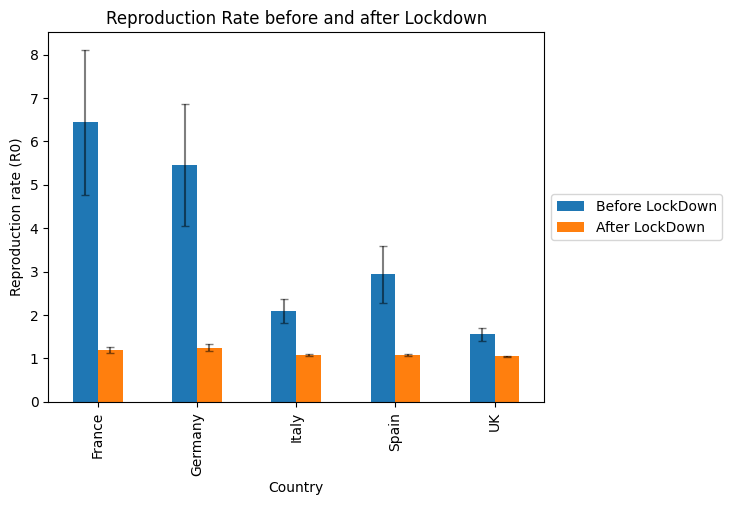

In [5]:
df = pd.DataFrame(data).T
df_sd = pd.DataFrame(sd).T
barplotReproduction(df,df_sd)

### World Map

In [12]:
df = pd.DataFrame(data).T
df.columns = ['before_R0','after_R0']
df['SOVEREIGNT'] = ['France','Germany','Italy','Spain','United Kingdom']
# General Information
country_list = ['France','Germany','Italy','Spain','United Kingdom']
col = "Example"
map_df = geo_df[geo_df['NAME'].isin(country_list)]
map_df = map_df.merge(df, on=['SOVEREIGNT'])

/Users/zenodeangeli/Library/Python/3.9/lib/python/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


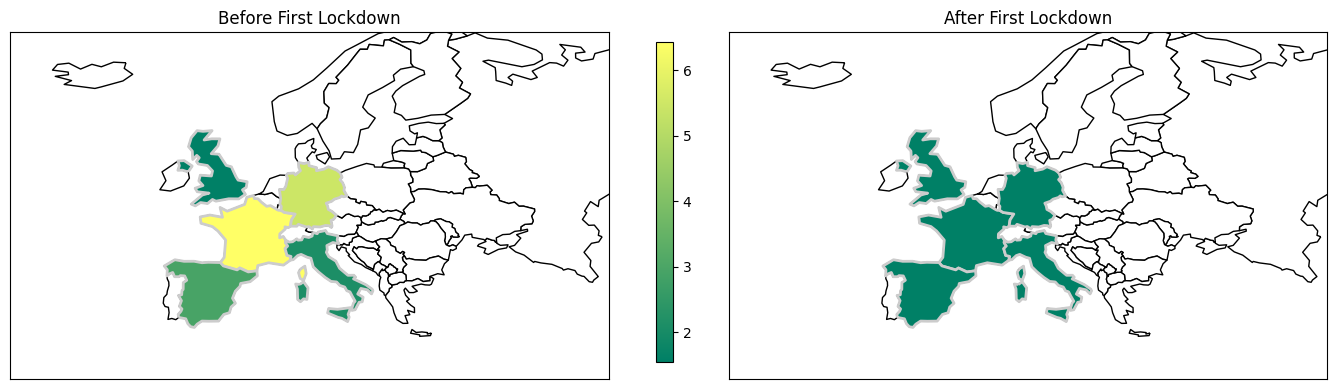

In [13]:
fig, (ax, ax2) = plt.subplots(1,2, figsize=(17,8))    

# Plotting the desired continent
geo_df[(geo_df["CONTINENT"] == "Europe")].plot(column=col, ax=ax, color='white', edgecolor='black')

col = 'before_R0'
vmin = df[col].min()
vmax = df[col].max()

# Adding Cmap to 
cmap = 'summer'

sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
map_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=2, cmap=cmap)
cbaxes = fig.add_axes([0.505, 0.30, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)
# Setting Axis limits
ax.set_xlim(-30, 50)
ax.set_ylim(30, 70)
ax.set_title('Before First Lockdown')

col = 'after_R0'
geo_df[(geo_df["CONTINENT"] == "Europe")].plot(column=col, ax=ax2, color='white', edgecolor='black')
# Adding Cmap to 
map_df.plot(column=col, ax=ax2, edgecolor='0.8', linewidth=2, cmap=cmap,norm=plt.Normalize(vmin=vmin, vmax=vmax))
# Setting Axis limits
ax2.set_xlim(-30, 50)
ax2.set_ylim(30, 70)
ax2.set_xticks=[]
ax2.set_title('After First Lockdown')
ax2.tick_params(
    axis='both',        # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False, 
    left=False,
    labelleft=False,        # ticks along the top edge are off
    labelbottom=False)
ax.tick_params(
    axis='both',        # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False, 
    left=False,
    labelleft=False,        # ticks along the top edge are off
    labelbottom=False)

## Second Lockdown

### Bar plot

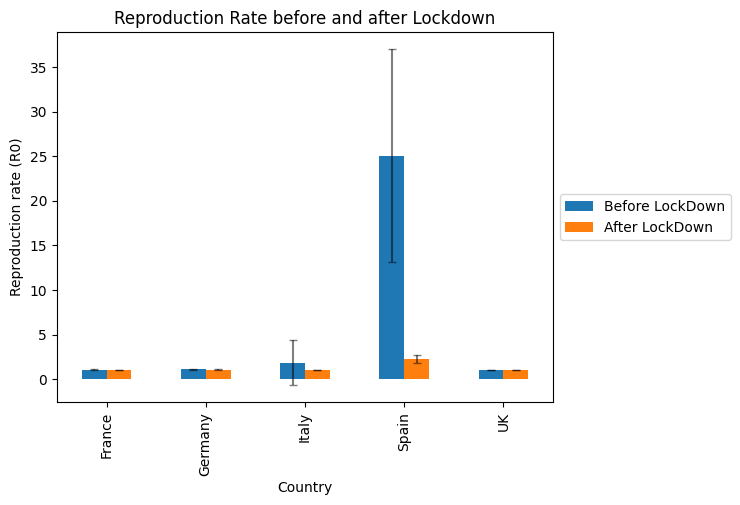

In [22]:
df = pd.DataFrame(data_sl).T
df_sd = pd.DataFrame(sd_sl).T
barplotReproduction(df,df_sd)

### World Map

In [18]:
df = pd.DataFrame(data_sl).T
df.columns = ['before_R0','after_R0']
df['SOVEREIGNT'] = ['France','Germany','Italy','Spain','United Kingdom']
df
# General Information
country_list = ['France','Germany','Italy','Spain','United Kingdom']
col = "Example"
map_df = geo_df[geo_df['NAME'].isin(country_list)]
map_df = map_df.merge(df, on=['SOVEREIGNT'])
map_df.loc[map_df['SOVEREIGNT'] == 'Spain', 'before_R0'] = 1.7


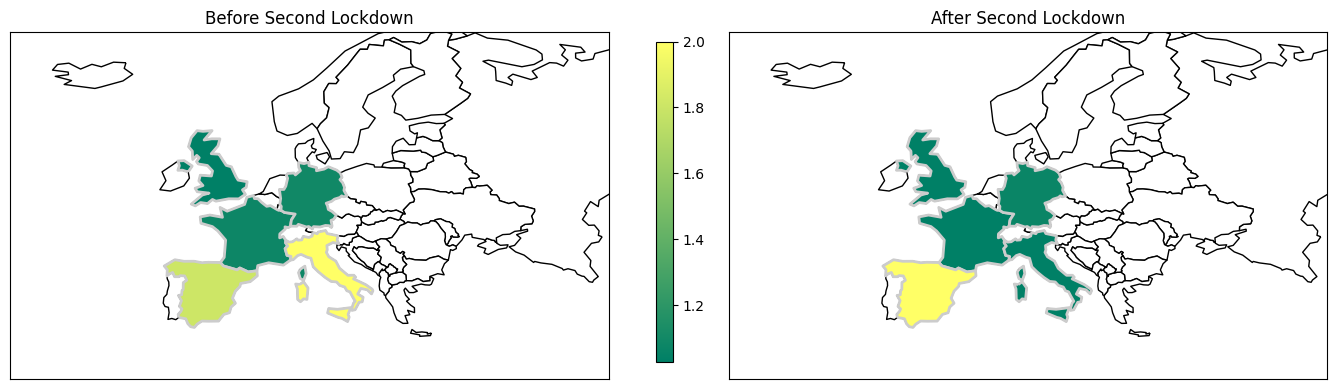

In [21]:
fig, (ax, ax2) = plt.subplots(1,2, figsize=(17,8))    

# Plotting the desired continent
geo_df[(geo_df["CONTINENT"] == "Europe")].plot(column=col, ax=ax, color='white', edgecolor='black')

col = 'before_R0'
vmin = df[col].min()
vmax = 2

# Adding Cmap to 
cmap = 'summer'

sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
map_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=2, cmap=cmap)
cbaxes = fig.add_axes([0.505, 0.30, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)
# Setting Axis limits
ax.set_xlim(-30, 50)
ax.set_ylim(30, 70)
ax.set_title('Before Second Lockdown')

col = 'after_R0'
geo_df[(geo_df["CONTINENT"] == "Europe")].plot(column=col, ax=ax2, color='white', edgecolor='black')
# Adding Cmap to 
map_df.plot(column=col, ax=ax2, edgecolor='0.8', linewidth=2, cmap=cmap,norm=plt.Normalize(vmin=vmin, vmax=vmax))
# Setting Axis limits
ax2.set_xlim(-30, 50)
ax2.set_ylim(30, 70)
ax2.set_xticks=[]
ax2.set_title('After Second Lockdown')
ax2.tick_params(
    axis='both',        # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False, 
    left=False,
    labelleft=False,        # ticks along the top edge are off
    labelbottom=False)
ax.tick_params(
    axis='both',        # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False, 
    left=False,
    labelleft=False,        # ticks along the top edge are off
    labelbottom=False)